Импортируем пакет NumPy с псевдонимом np

In [179]:
import numpy as np

Установим число символов после запятой при печати

In [180]:
np.set_printoptions(precision=3, suppress=True)

Массивы numpy можно создавать как из плоских списков

In [181]:
np.array([2, 5, 0])

array([2, 5, 0])

так и из вложеных

In [182]:
np.array([[2, 5, 0],
          [3, 5, 1],
          [3, 7, 8]])

array([[2, 5, 0],
       [3, 5, 1],
       [3, 7, 8]])

Для создания нулевых векторов и матриц можно использовать функцию zeros

In [183]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [184]:
np.zeros((3, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Для матриц состоящих из одних единиц есть аналогочная функция ones.

In [185]:
np.ones(3)

array([ 1.,  1.,  1.])

In [186]:
np.ones((3, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

С помощью функции eye можно создать единичную матрицу нужной размерности

In [187]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Для генерации диапазонов чисел удобно использовать функцию arange

In [188]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Её параметры позволяют указать начало и конец полуинтервала, а также шаг и тип данных.

In [189]:
np.arange(2, 10, 2, dtype=np.float)

array([ 2.,  4.,  6.,  8.])

Если нужно получить равномерную сетку, то удобней воспользоваться функцией linspace

In [190]:
np.linspace(1.0, 4.0, 10)

array([ 1.   ,  1.333,  1.667,  2.   ,  2.333,  2.667,  3.   ,  3.333,
        3.667,  4.   ])

Часто для примера бывает нужно быстро создать матрицу, заполненную случайными числами.

In [191]:
np.random.rand(3, 3)

array([[ 0.406,  0.249,  0.851],
       [ 0.226,  0.324,  0.718],
       [ 0.464,  0.984,  0.2  ]])

Одним из мощнейших инструментов работы с многомерными массивами являются срезы (slices)

In [192]:
x = np.random.rand(3, 3)
x

array([[ 0.746,  0.793,  0.335],
       [ 0.115,  0.633,  0.895],
       [ 0.562,  0.281,  0.259]])

In [193]:
x[:, 0]

array([ 0.746,  0.115,  0.562])

In [194]:
x[1, :]

array([ 0.115,  0.633,  0.895])

С помощью срезов можно организовать присваивания по строкам или столбцам

In [195]:
x[:, 0] = x[:, 1]
x

array([[ 0.793,  0.793,  0.335],
       [ 0.633,  0.633,  0.895],
       [ 0.281,  0.281,  0.259]])

Для транспонирования матриц в пакете numpy имеется функция transpose

In [196]:
np.transpose(x)

array([[ 0.793,  0.633,  0.281],
       [ 0.793,  0.633,  0.281],
       [ 0.335,  0.895,  0.259]])

Для сохранения матриц в файл и загрузки из файла в память можно использовать соответвующие функции

In [197]:
x = np.random.rand(10, 2)
np.savetxt("x.csv", x, delimiter=',', fmt="%.5g")
y = np.loadtxt("x.csv", delimiter=',')
y

array([[ 0.369,  0.736],
       [ 0.262,  0.795],
       [ 0.696,  0.58 ],
       [ 0.597,  0.023],
       [ 0.704,  0.091],
       [ 0.189,  0.598],
       [ 0.296,  0.703],
       [ 0.651,  0.951],
       [ 0.316,  0.776],
       [ 0.515,  0.221]])

Особое внимание следует обратить на то, что при использовании обычных арифметических операторов будут произведены поэлементные операции

In [198]:
a = np.random.rand(3)
b = np.random.rand(3)

In [199]:
a + b

array([ 1.235,  1.195,  0.867])

In [200]:
a - b

array([-0.137, -0.487, -0.769])

In [201]:
a * b

array([ 0.376,  0.298,  0.04 ])

In [202]:
a / b

array([ 0.8  ,  0.421,  0.06 ])

In [203]:
X = np.random.rand(3, 3)
X * a

array([[ 0.24 ,  0.029,  0.019],
       [ 0.545,  0.238,  0.035],
       [ 0.354,  0.258,  0.008]])

Чтобы выполнить матричное умножение следует использовать функцию dot

In [204]:
np.dot(X, a)

array([ 0.289,  0.817,  0.621])

Для решения СЛАУ, заданного в матричном виде используется функция solve

In [205]:
A = np.random.rand(3, 3)
b = np.random.rand(3)
x = np.linalg.solve(A, b)
np.dot(A, x) - b

array([ 0.,  0., -0.])

Для обращения матриц используется функция inv

In [206]:
A = np.random.rand(3, 3)
Ainv = np.linalg.inv(A)
np.dot(Ainv, A)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [-0.,  0.,  1.]])

Рассмотрим простой пример использования обращения матриц на основе решения задачи линейной регресии методом наименьших квадратов. 

Вначале сгенерируем исходные данные с помощью функций linspace и внесем шум с помощью np.random.randn

In [207]:
X = np.linspace(-2, 3, 30)
X = X + np.random.randn(len(X)) * 0.1
y = 41 * X + 11
y = y + np.random.randn(len(y)) * 10

Визуализируем результат генерации в виде точек.

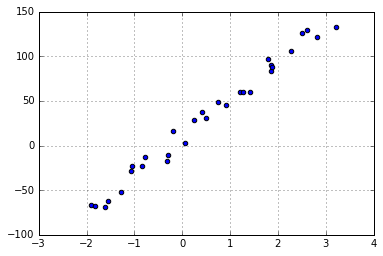

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.grid()

В соответствии с методом наименьших квадратов вычислим коэфициенты регресии как
$$
    b = (X^T X)^{-1}X^T y
$$
здесь $X$ - расширенная матрица

$$
    X = \begin{pmatrix}
        x_1 & 1 \\
        x_2 & 1 \\
        \vdots \\
        x_n & 1
    \end{pmatrix}
$$

In [209]:
X1 = np.hstack((np.ones((len(X), 1)), X.reshape(len(X), 1)))
b = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X1), X1)), np.transpose(X1)), y)

Вычислим точки линейной регресси для визуализации

In [210]:
xx = np.linspace(min(X), max(X), 3, 100)
yy = xx*b[1] + b[0]

и нарисуем все вместе

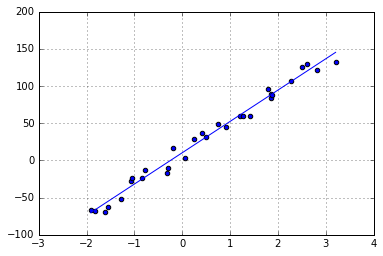

In [211]:
plt.plot(xx, yy)
plt.scatter(X, y)
plt.grid()